In [1]:
# import the module for simulating data
from statsmodels.tsa.arima_process import ArmaProcess
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Simulate AR(1) Time Series

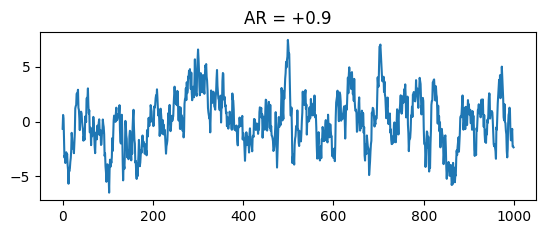

In [2]:
# Plot 1: AR parameter = +0.9
plt.subplot(2,1,1)
ar1 = np.array([1, -0.9])
ma1 = np.array([1])
AR_object1 = ArmaProcess(ar1,ma1)
simulated_data_1 = AR_object1.generate_sample(nsample=1000)
plt.title('AR = +0.9')
plt.plot(simulated_data_1)

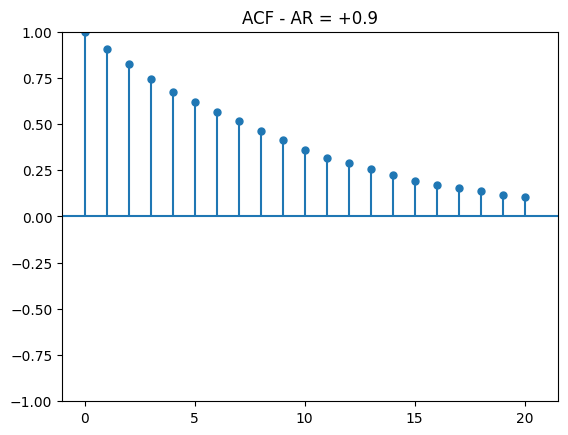

In [3]:
# Import the plot_acf module from statsmodels
from statsmodels.graphics.tsaplots import plot_acf

# Plot 1: AR parameter = +0.9
plot_acf(simulated_data_1, alpha=1, lags=20)

plt.title('ACF - AR = +0.9')
plt.show()

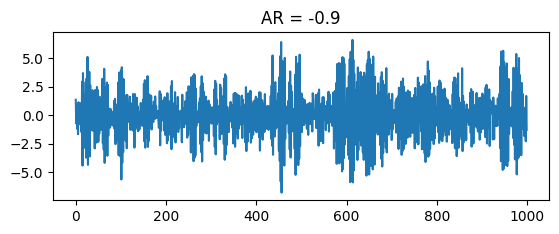

In [4]:
# Plot 2: AR parameter = -0.9
plt.subplot(2,1,2)
ar2 = np.array([1, 0.9])
ma2 = np.array([1])
AR_object2 = ArmaProcess(ar2,ma2)
simulated_data_2 = AR_object2.generate_sample(nsample=1000)
plt.plot(simulated_data_2)
plt.title('AR = -0.9')
plt.show()

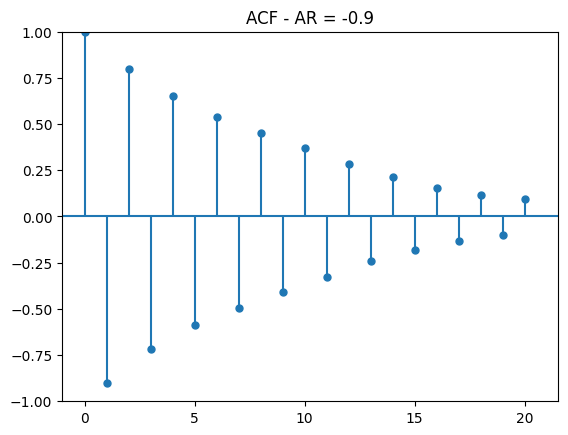

In [5]:
# Plot 2: AR parameter = -0.9
plot_acf(simulated_data_2, alpha=1, lags=20)
plt.title('ACF - AR = -0.9')
plt.show()


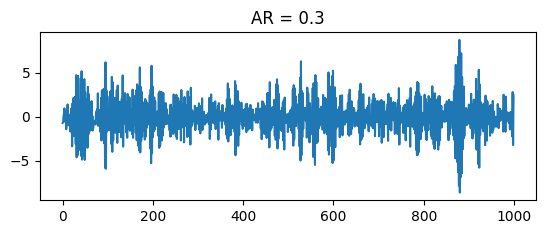

In [6]:
# Plot 2: AR parameter = -0.9
plt.subplot(2,1,2)
ar2 = np.array([1, 0.9])
ma2 = np.array([1])
AR_object2 = ArmaProcess(ar2,ma2)
simulated_data_2 = AR_object2.generate_sample(nsample=1000)
plt.plot(simulated_data_2)
plt.title('AR = 0.3')
plt.show()

# Estimating and Forecasting AR 

In [7]:
# Import the ARIMA module from statsmodels
from statsmodels.tsa.arima.model import ARIMA

In [8]:
# Fit an AR(1) model to the first simulated data
mod = ARIMA(simulated_data_1, order=(1,0,0)) # 1 is Order - AR, just autoregressive
res = mod.fit()

# Print out summary information on the fit
print(res.summary())

# Print out the estimate for phi
print("When the true phi=0.9, the estimate of phi is:")
print(res.params[1])

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -1420.909
Date:                Mon, 23 Jan 2023   AIC                           2847.818
Time:                        11:11:01   BIC                           2862.541
Sample:                             0   HQIC                          2853.414
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0007      0.331      0.002      0.998      -0.647       0.649
ar.L1          0.9043      0.014     65.344      0.000       0.877       0.931
sigma2         1.0022      0.046     21.855      0.0

In [9]:
simulated_data_1 = pd.DataFrame(simulated_data_1)

In [10]:
simulated_data_1

,0
0,-0.644520
1,0.609127
2,0.264582
3,-1.683936
4,-3.280304
...,...
995,-1.020491
996,-0.660219
997,-2.258121
998,-2.267323


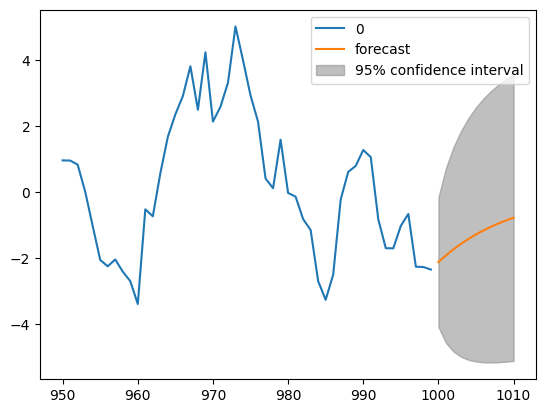

In [11]:
# Import the ARIMA and plot_predict from statsmodels
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict

# Forecast the first AR(1) model
mod = ARIMA(simulated_data_1, order=(1,0,0))
res = mod.fit()

# Plot the data and the forecast
fig, ax = plt.subplots()
simulated_data_1.loc[950:].plot(ax=ax)
plot_predict(res, start=1000, end=1010, ax=ax)
plt.show()

In [12]:
interest_rate_data = np.array([ 3.85,  4.14,  4.21,  4.65,  4.64,  5.7 ,  6.16,  7.88,  6.5 ,
        5.89,  6.41,  6.9 ,  7.4 ,  7.76,  6.81,  7.78,  9.15, 10.33,
       12.43, 13.98, 10.36, 11.82, 11.55,  9.  ,  7.23,  8.83,  9.14,
        7.93,  8.08,  6.71,  6.7 ,  5.83,  7.84,  5.58,  6.43,  5.75,
        4.65,  6.45,  5.12,  5.07,  3.83,  4.27,  4.24,  4.39,  4.71,
        4.04,  2.25,  3.85,  3.3 ,  1.89,  1.78,  3.04,  2.17,  2.27,
        2.45,  2.16])

interest_rate_data = pd.DataFrame(interest_rate_data)

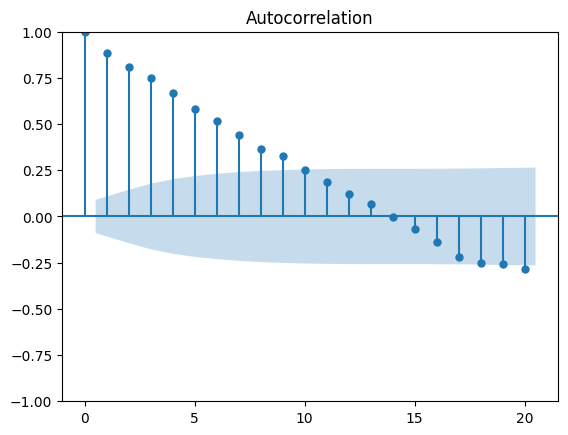

In [13]:
# Plot 1: AR parameter = +0.9
plot_acf(interest_rate_data, alpha=0.5, lags=20);

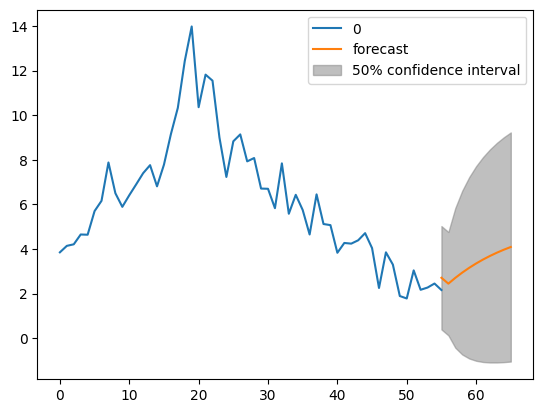

In [14]:
# Forecast interst rates using an AR(1) model
mod = ARIMA(interest_rate_data, order=(1,0,0))
res = mod.fit()

# Plot the data and the forecast
fig, ax = plt.subplots()
interest_rate_data.plot(ax=ax)
plot_predict(res, start=55, end=65, alpha=0.5, ax=ax)
plt.show()

In [15]:
simulated_data = np.array([5.        , 4.77522278, 5.60354317, 5.96406402, 5.97965372,
       6.02771876, 5.5470751 , 5.19867084, 5.01867859, 5.50452928,
       5.89293842, 4.6220103 , 5.06137835, 5.33377592, 5.09333293,
       5.37389022, 4.9657092 , 5.57339283, 5.48431854, 4.68588587,
       5.25218625, 4.34800798, 4.34544412, 4.72362568, 4.12582912,
       3.54622069, 3.43999885, 3.77116252, 3.81727011, 4.35256176,
       4.13664247, 3.8745768 , 4.01630403, 3.71276593, 3.55672457,
       3.07062647, 3.45264414, 3.28123729, 3.39193866, 3.02947806,
       3.88707349, 4.28776889, 3.47360734, 3.33260631, 3.09729579,
       2.94652178, 3.50079273, 3.61020341, 4.23021143, 3.94289347,
       3.58422345, 3.18253962, 3.26132564, 3.19777388, 3.43527681,
       3.37204482])

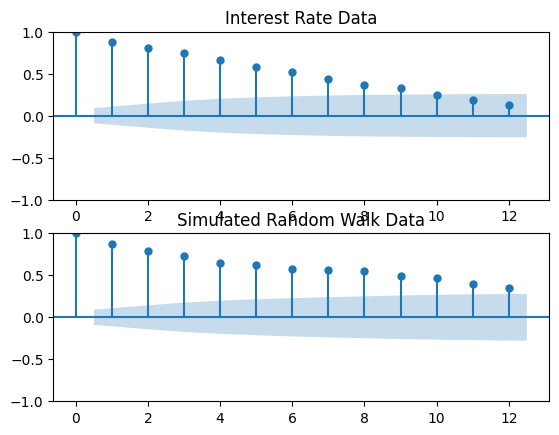

In [16]:
# Import the plot_acf module from statsmodels
from statsmodels.graphics.tsaplots import plot_acf

# Plot the interest rate series and the simulated random walk series side-by-side
fig, axes = plt.subplots(2,1)

# Plot the autocorrelation of the interest rate series in the top plot
fig = plot_acf(interest_rate_data, alpha=0.5, lags=12, ax=axes[0])

# Plot the autocorrelation of the simulated random walk series in the bottom plot
fig = plot_acf(simulated_data, alpha=0.5, lags=12, ax=axes[1])

# Label axes
axes[0].set_title("Interest Rate Data")
axes[1].set_title("Simulated Random Walk Data")
plt.show()

## Choosing best order

Using BIC, lowest BIC value should be the better order to use

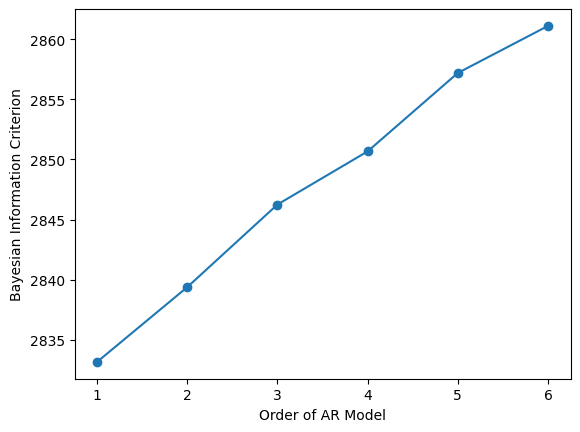

In [17]:
# Import the module for estimating an ARIMA model
from statsmodels.tsa.arima.model import ARIMA

# Fit the data to an AR(p) for p = 0,...,6 , and save the BIC
BIC = np.zeros(7)
for p in range(7):
    mod = ARIMA(simulated_data_2, order=(p,0,0))
    res = mod.fit()
# Save BIC for AR(p)    
    BIC[p] = res.bic
    
# Plot the BIC as a function of p
plt.plot(range(1,7), BIC[1:7], marker='o')
plt.xlabel('Order of AR Model')
plt.ylabel('Bayesian Information Criterion')
plt.show()

# Simulation MA Process

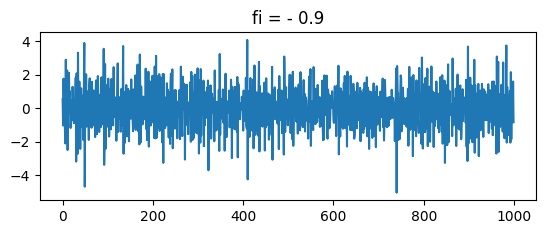

In [18]:
# import the module for simulating data
from statsmodels.tsa.arima_process import ArmaProcess

# Plot 1: MA parameter = -0.9
plt.subplot(2,1,1)
ar1 = np.array([1])
ma1 = np.array([1, -0.9])
MA_object1 = ArmaProcess(ar1, ma1)
simulated_data_1 = MA_object1.generate_sample(nsample=1000)
plt.title('fi = - 0.9')
plt.plot(simulated_data_1)

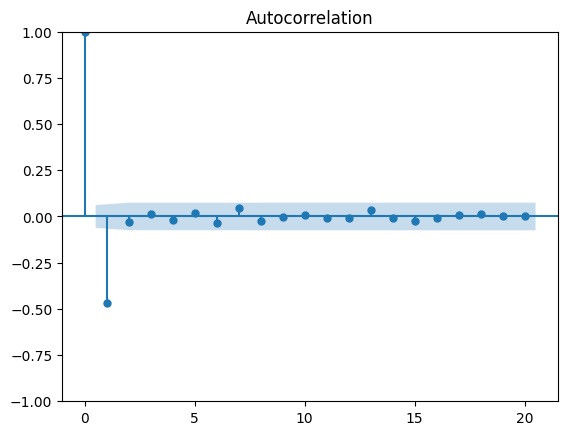

In [19]:
# Import the plot_acf module from statsmodels
from statsmodels.graphics.tsaplots import plot_acf

# Plot 1: MA parameter = -0.9
plot_acf(simulated_data_1, lags=20)
plt.show()

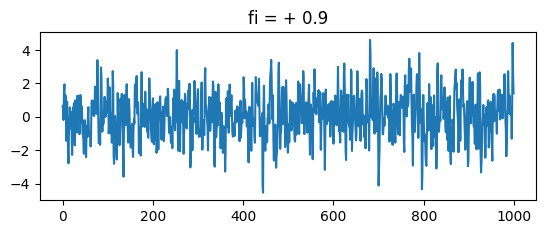

In [20]:
# Plot 2: MA parameter = +0.9
plt.subplot(2,1,2)
ar2 = np.array([1])
ma2 = np.array([1, 0.9])
MA_object2 = ArmaProcess(ar2, ma2)
simulated_data_2 = MA_object2.generate_sample(nsample=1000)
plt.title('fi = + 0.9')
plt.plot(simulated_data_2)

plt.show()

# Estimating and Forecasting MA model

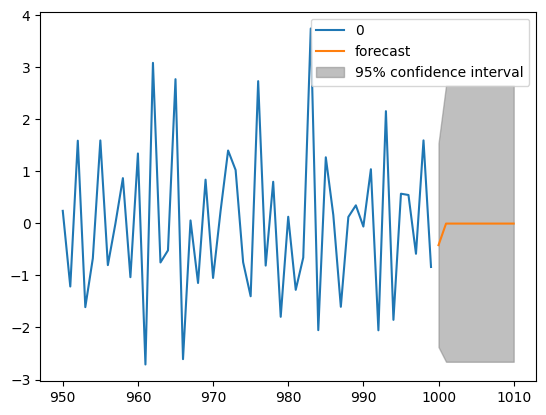

In [21]:
# Import the ARIMA module from statsmodels
from statsmodels.tsa.arima.model import ARIMA

# Fit an MA(1) model to the first simulated data
mod = ARIMA(simulated_data_1, order=(0,0,1))
res = mod.fit()

# Print out summary information on the fit
print(res.summary())

# Print out the estimate for the constant and for theta
print("When the true theta=-0.9, the estimate of theta is:")
print(res.params[1])

In [22]:
simulated_data_1 = pd.DataFrame(simulated_data_1)

In [23]:
from statsmodels.graphics.tsaplots import plot_predict

In [24]:
simulated_data_1.loc[950:].plot(ax=ax)
plt.show()

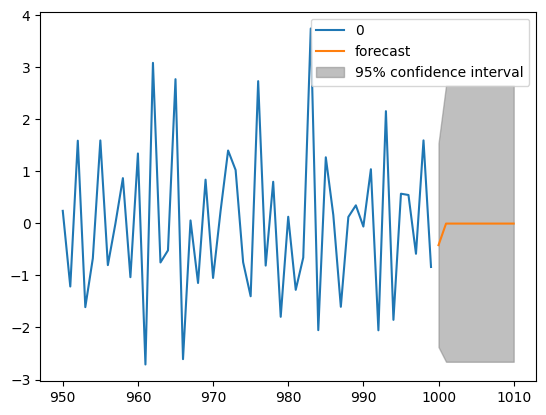

In [38]:
# Plot the data and the forecast
fig, ax = plt.subplots()
simulated_data_1.loc[950:].plot(ax=ax)
plot_predict(res, start=1000, end=1010, ax=ax)
plt.show()

# Cases

In [39]:
intraday = pd.read_csv('./stocks_data/Sprint_Intraday.txt')

In [40]:
intraday

,a1504272600,8.29,8.3,8.29.1,8.3.1,32407
0,1,8.2700,8.3000,8.2500,8.290,28467
1,2,8.2800,8.2800,8.2800,8.280,1500
2,3,8.2750,8.2800,8.2701,8.280,5200
3,4,8.2875,8.2875,8.2800,8.280,2900
4,5,8.2800,8.2876,8.2800,8.285,8400
...,...,...,...,...,...,...
383,386,8.2750,8.2850,8.2700,8.280,82263
384,387,8.2800,8.2800,8.2700,8.275,20617
385,388,8.2750,8.2800,8.2700,8.275,21428
386,389,8.2750,8.2800,8.2700,8.275,24974


# Equivalence of AR(1) and MA(infinity)

 AR(1) model is equivalent to an MA(infinity
) model with the appropriate parameters.

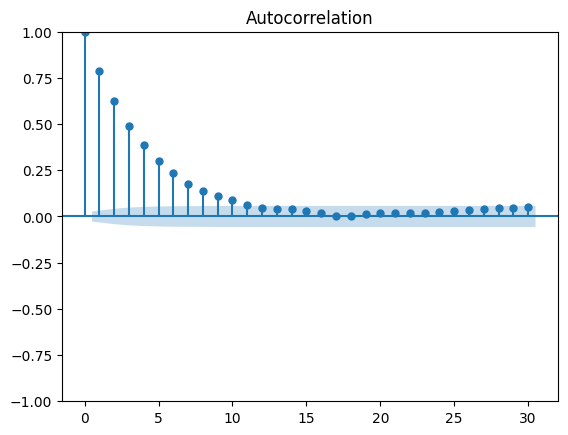

In [41]:
# import the modules for simulating data and plotting the ACF
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_acf

# Build a list MA parameters
ma = [0.8**i for i in range(30)]

# Simulate the MA(30) model
ar = np.array([1])
AR_object = ArmaProcess(ar,ma)
simulated_data = AR_object.generate_sample(nsample=5000)

# Plot the ACF
plot_acf(simulated_data, lags=30)
plt.show()

# Cointegration

In [42]:
HO = pd.read_csv('./stocks_data/CME_HO1.csv')
NG = pd.read_csv('./stocks_data/CME_NG1.csv')

In [53]:
HO.Date = HO.Date.astype('datetime64')
NG.Date = NG.Date.astype('datetime64')

In [55]:
HO.set_index('Date',inplace=True)
NG.set_index('Date',inplace=True)

In [56]:
HO

,Close
Date,
2005-12-30,1.7280
2005-12-29,1.7030
2005-12-28,1.6825
2005-12-27,1.6370
2005-12-23,1.7053
...,...
1991-01-08,0.7430
1991-01-07,0.7617
1991-01-04,0.6830


In [57]:
NG

,Close
Date,
2005-12-30,11.225
2005-12-29,11.223
2005-12-28,11.431
2005-12-27,11.022
2005-12-23,12.283
...,...
1991-01-08,1.786
1991-01-07,1.785
1991-01-04,1.743


In [72]:
# Import the adfuller module from statsmodels
from statsmodels.tsa.stattools import adfuller,coint

# Compute the ADF for HO and NG
result_HO = adfuller(HO['Close'])
print("The p-value for the ADF test on HO is ", result_HO[1])
result_NG = adfuller(NG['Close'])
print("The p-value for the ADF test on NG is ", result_NG[1])

# Compute the ADF of the spread
result_spread = adfuller(7.25 * HO - NG)
print("The p-value for the ADF test on the spread is ", result_spread[1])

The p-value for the ADF test on HO is  0.019831028071627756
The p-value for the ADF test on NG is  0.004547284956542362
The p-value for the ADF test on the spread is  0.000118870518273533


In [73]:
coint(HO*7.25,NG)

(-4.248396508384099,
 0.003077385582392626,
 array([-3.89936055, -3.33775854, -3.04558028]))

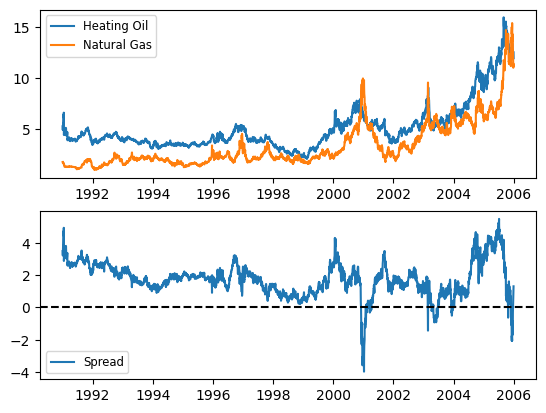

In [59]:
# Plot the prices separately
plt.subplot(2,1,1)
plt.plot(7.25*HO, label='Heating Oil')  # $/gallon x 7.25, which converts it to $/millionBTU ( Same unit as Natural Gas)
plt.plot(NG, label='Natural Gas')
plt.legend(loc='best', fontsize='small')

# Plot the spread
plt.subplot(2,1,2)
plt.plot(7.25*HO-NG, label='Spread')
plt.legend(loc='best', fontsize='small')
plt.axhline(y=0, linestyle='--', color='k')
plt.show()

In [69]:
adfuller(7.25*HO-NG)[1]

0.000118870518273533

In [ ]:
# Import the statsmodels module for regression and the adfuller function
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

# Regress BTC on ETH
ETH = sm.add_constant(ETH)
result = sm.OLS(BTC,ETH).fit()

# Compute ADF
b = result.params[1]
adf_stats = adfuller(BTC['Price'] - b*ETH['Price'])
print("The p-value for the ADF test is ", adf_stats[1])

# Business Case

In [118]:
temp_NY =  pd.read_csv('./data/ny_climate.csv')

In [119]:
temp_NY

,DATE,TAVG
0,1870,53.8
1,1871,51.3
2,1872,51.3
3,1873,50.9
4,1874,51.3
...,...,...
142,2012,57.3
143,2013,55.3
144,2014,54.4
145,2015,56.7


In [120]:
temp_NY.isnull().sum()

DATE    0
TAVG    0
dtype: int64

In [121]:
temp_NY.DATE = pd.to_datetime(temp_NY.DATE, format='%Y')

In [122]:
temp_NY.set_index('DATE',inplace=True)

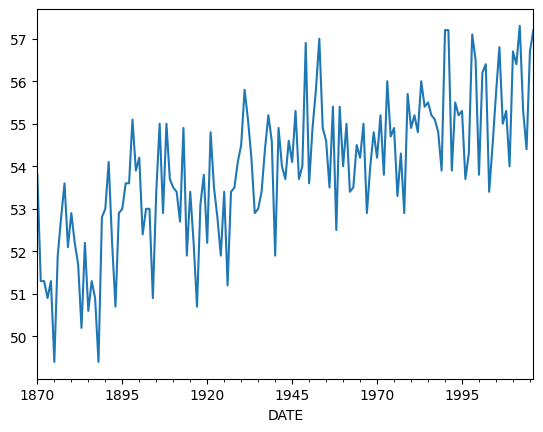

In [123]:
# Plot average temperatures
temp_NY.TAVG.plot()
plt.show()

# Testing Random Walk

In [108]:
def adfuller_eval(x):
    
    result = adfuller(x)[1]
    
    if result >= (5/100):
        
        return f'p_value: {result} não podemos rejeitar Ho, de que é uma Random Walk'
    
    else:
        
        return f'p_value: {result} rejeita-se Ho, não é uma Random Walk'
    
    

In [109]:
temp_NY['TAVG'].autocorr() # Indica um Momento 

0.5705478431596491

In [110]:
adfuller_eval(temp_NY['TAVG'])

'p_value: 0.5832938987871126 não podemos rejeitar Ho, de que é uma Random Walk'

### Tratando não estacionariedade

In [111]:
temp_NY.TAVG = temp_NY.diff()

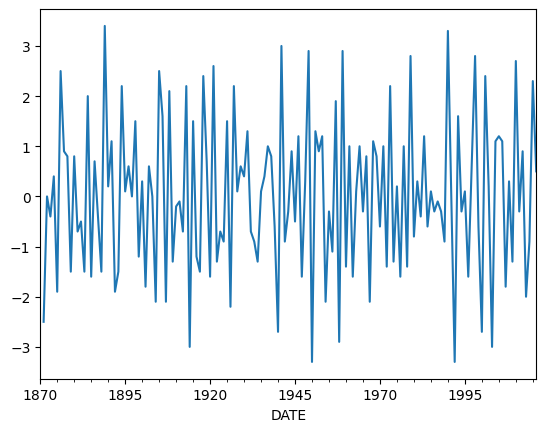

In [112]:
# Plot average temperatures
temp_NY.TAVG.plot()
plt.show()

In [113]:
temp_NY['TAVG'].autocorr() # Indica um Mean Reverting

-0.461600056700202

In [114]:
adfuller_eval(temp_NY['TAVG'].dropna())

'p_value: 9.824533837707675e-14 rejeita-se Ho, não é uma Random Walk'

## ACF

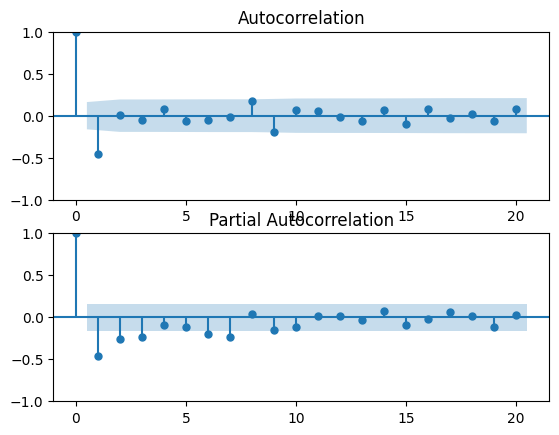

In [127]:
# Import the modules for plotting the sample ACF and PACF
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Take first difference of the temperature Series
chg_temp = temp_NY.diff()
chg_temp = chg_temp.dropna()

# Plot the ACF and PACF on the same page
fig, axes = plt.subplots(2,1)

# Plot the ACF
plot_acf(chg_temp, lags=20, ax=axes[0])

# Plot the PACF
plot_pacf(chg_temp, lags=20, ax=axes[1])
plt.show()

## Model

order = (p,d,q)

- p - AR order, qty of terms;
- d - how much time we did the diff()
- q - MA order, qty of terms;

In [140]:
# Import the module for estimating an ARIMA model
from statsmodels.tsa.arima.model import ARIMA

# Fit the data to an AR(1) model and print AIC:
mod_ar1 = ARIMA(chg_temp, order=(1, 0, 0))
res_ar1 = mod_ar1.fit()
print("The AIC for an AR(1) is: ", res_ar1.aic)

# Fit the data to an AR(2) model and print AIC:
mod_ar2 = ARIMA(chg_temp, order=(2,0,0))
res_ar2 = mod_ar2.fit()
print("The AIC for an AR(2) is: ", res_ar2.aic)

# Fit the data to an ARMA(1,1) model and print AIC:
mod_arma11 = ARIMA(chg_temp, order=(1, 1,1))
res_arma11 = mod_arma11.fit()
print("The AIC for an ARMA(1,1) is: ", res_arma11.aic)

The AIC for an AR(1) is:  510.5346898733109
The AIC for an AR(2) is:  501.92741234091363
The AIC for an ARMA(1,1) is:  513.8148329481594


C:\Users\rodri\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\rodri\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\rodri\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\rodri\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\rodri\AppData\Local\Programs\Py

Escolhemos o menor AIC - ARIMA(1,0,1)

C:\Users\rodri\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\rodri\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\rodri\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


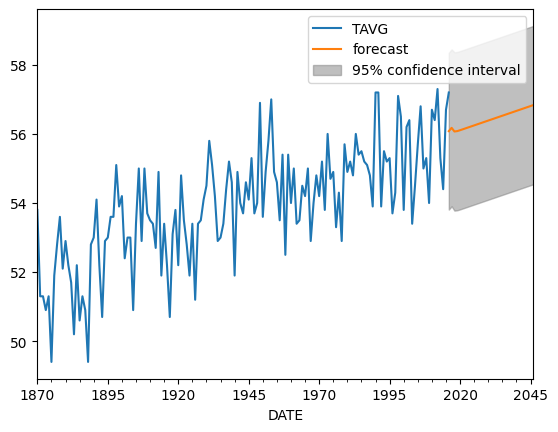

In [152]:
# Import the ARIMA module from statsmodels
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict

# Forecast temperatures using an ARIMA(1,1,1) model
mod = ARIMA(temp_NY, trend='t', order=(1,1,1)) #positive trend since we have a slope
res = mod.fit()

# Plot the original series and the forecasted series
fig, ax = plt.subplots()
temp_NY.plot(ax=ax)
plot_predict(res, start=str(temp_NY.index.year.max()), end='2046', ax=ax)
plt.show()